In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #不能运行的话改成SimHei
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

Missing colon in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 (' 中文字体')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 759 ('font.family: sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 760 ('font.sans-serif: Arial Unicode MS, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 761 ('axes.unicode_minus: False')


# 原始数据

In [5]:
x=np.array([0,0.5,0.7,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,1.3,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.8,2,3])
# y=np.array([100,99.6,99.6,99.5,99.5,99.4,99,98,95.7,91.6,85.8,78.3,61.5,43.9,36.4,29.8,23.8,19,15,11.9,7.7,4.1,4.2])#水平
y=np.array([100,99.9,99.8,99.8,99.8,99.6,99.2,98.2,95.6,91.3,85.1,77.4,60.1,42.9,35.2,28,22.4,17.6,13.7,10.7,6.7,3.4,3.8])#垂直

In [6]:
print(x.shape, y.shape)

(23,) (23,)


# 分成三段拟合，第一、三段为直线，第二段为四次多项式

In [7]:
f1 = np.polyfit(x[:5], y[:5], 1)
xfit1 = np.linspace(0, x[4], 10)
yfit1 = np.polyval(f1, xfit1)

In [8]:
f2 = np.polyfit(x[5:-1], y[5:-1], 4) # 采用4次多项式拟合，f2为参数，np.array类型
xfit2 = np.linspace(x[5], x[-2], 5000)
yfit2 = np.polyval(f2, xfit2) # 得到拟合后的结果，np.array类型

In [9]:
f3 = np.polyfit(x[-2:],y[-2:], 1)
xfit3 = np.linspace(x[-2], 3, 10)
yfit3 = np.polyval(f3, xfit3)

In [10]:
yfit2

array([98.15863838, 98.17598511, 98.19326027, ...,  3.56319749,
        3.55939499,  3.5555826 ])

# 找到透射率最接近10%和90%的点

In [13]:
x_10 = xfit2[np.abs(yfit2-10)<0.1][0]
y_10 = yfit2[xfit2==x_10]
x_90 = xfit2[np.abs(yfit2-90)<0.1][0]
y_90 = yfit2[xfit2==x_90]
print(x_10,x_90)

1.7040408081616323 1.106621324264853


# 画图

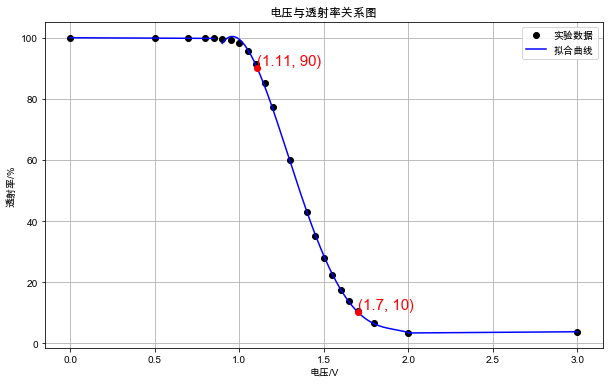

In [14]:
plt.figure(figsize=(10,6))
plt.title(r"电压与透射率关系图")
plt.ylabel(r"透射率/%")
plt.xlabel(r"电压/V")
plt.grid()
plt.plot(x, y, 'ok', label="实验数据")
plt.plot(xfit1, yfit1, color='b')
plt.plot(xfit2, yfit2, color='b', label="拟合曲线")
plt.plot(xfit3, yfit3, color='b')
plt.plot(x_10, y_10, "or")
plt.plot(x_90, y_90, "or")
plt.text(x_10, y_10, (float(x_10.round(2)), 10),ha='left', va='bottom', fontsize=15, color="r")
plt.text(x_90, y_90, (float(x_90.round(2)), 90),ha='left', va='bottom', fontsize=15, color="r")
plt.legend()
plt.savefig("液晶电光效应研究.jpg",dpi=150)